In [1]:
import os
import matplotlib.pyplot as plt
root = ''
chapter_id = 'MNIST'
images_path= os.path.join(root,'images',chapter_id,)
os.makedirs(images_path,exist_ok=True)
def save_fig(fig_id,tight_layout=True,fig_extension='png',resolution=True):
    path = os.path.join(images_path,fig_id+'.'+fig_extension)
    print('save figure', fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path,format=fig_extension,resolution=resolution)
        

In [2]:
# load data MNIST
import tensorflow as tf
import keras

fashion_MNIST = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = fashion_MNIST.load_data()

In [3]:
import numpy as np
import pandas as pd
# cek verion
tf.__version__

'2.9.1'

In [4]:
keras.__version__

'2.9.0'

look a range data sets from x_train

In [5]:
X_train_full.shape # 3 dimensi

(60000, 28, 28)

60.000 grayscale images dengan 28 x 28 pixels

1 pixel intensity merepresentasikan sebagai byte (0 to 255)

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
X_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [8]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [34]:
X_test.shape

(10000, 28, 28)

In [33]:
y_test.shape

(10000,)

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [9]:
X_valid, X_train = (X_train_full[:5000] / 255.) , (X_train_full[5000:] / 255.)
y_valid, y_train = (y_train_full[:5000]), (y_train_full[5000:])
X_test = X_test / 255.

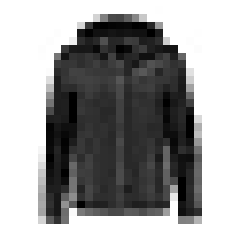

In [10]:
plt.imshow(X_train[0],cmap='binary')
plt.axis('off')
plt.show()

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [12]:
class_names[y_train[0]]

'Coat'

In [13]:
X_valid.shape

(5000, 28, 28)

In [14]:
X_test.shape

(10000, 28, 28)

The validation set contains 5,000 images, and the test set contains 10,000 images:

save figure fashion_mnist_plot


C:\Users\User\AppData\Local\Temp\ipykernel_10984\1197260370.py:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "resolution" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(path,format=fig_extension,resolution=resolution)


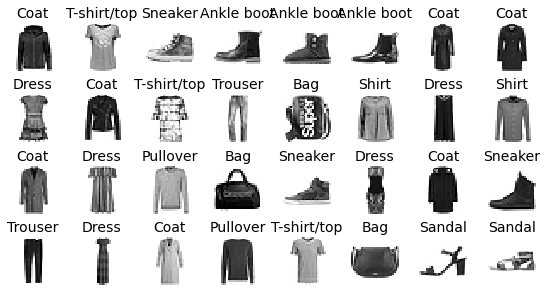

In [15]:
# data ditampilkan dengan 4 baris 8 kolom
n_rows = 4
n_columns= 8

plt.figure(figsize=(n_columns * 1.2, n_rows * 1.2))

for row in range(n_rows):
    for col in range(n_columns):
        index = n_columns * row + col
        plt.subplot(n_rows,n_columns, index + 1) # ngeplot secara iterasi
        plt.imshow(X_train[index], cmap='binary',interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]],fontsize=14)
plt.subplots_adjust(wspace=0.2,hspace=0.5)
save_fig('fashion_mnist_plot',tight_layout=False)
plt.show()
    

In [16]:
# create model sequential
model = keras.Sequential()
# convert input data to 1 D data by the shape
model.add(keras.layers.Flatten(input_shape=[28,28]))
# make dense layer/ hidden layer
# Relu => 0 - ~ compturasi value isnt negatif, negatif = nol.
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
# softmax -> range value 0 and 1
model.add(keras.layers.Dense(10, activation ='softmax'))

keras.backend.clear_session()

In [17]:
# membuat dengan models
model2  = keras.models.Sequential(
    [
        keras.layers.Flatten(input_shape=[28,28]),
        keras.layers.Dense(300,activation='relu'),
        keras.layers.Dense(100,activation ='relu'),
        keras.layers.Dense(10, activation='softmax')                
    ]
)
model2.layers

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [19]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


params di dapat dari hasil kali dari input dengan weight

In [20]:
model2.layers


In [21]:
hidden1=model2.layers[1]
hidden1.name

'dense'

In [22]:
weights,biases = hidden1.get_weights()
weights.shape

(784, 300)

In [23]:
biases.shape

(300,)

In [27]:
keras.utils.plot_model(model2,'my_fashion_mnist.png',show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


model compile to cost function of loss function and evaluation model to optimzer to use.

In [28]:
# compile model to know the lost function
model2.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

In [32]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(55000, 28, 28) (55000,)
(5000, 28, 28) (5000,)
(10000, 28, 28) (10000,)


In [36]:
history = model2.fit(X_train,y_train,epochs=30,
                     validation_data=(X_valid,y_valid))
# train => 55.000 -> 30 epoch -> 1 epoch terdiri dari 1.833,3 data train
# dengan validasi data untuk loss function diambil 5000, 1 epoch => 167 data.

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2237 - accuracy: 0.9192 - val_loss: 0.2943 - val_accuracy: 0.8922
Epoch 2/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.2202 - accuracy: 0.9208 - val_loss: 0.2941 - val_accuracy: 0.8952
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2179 - accuracy: 0.9215 - val_loss: 0.2874 - val_accuracy: 0.8962
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2135 - accuracy: 0.9244 - val_loss: 0.3000 - val_accuracy: 0.8926
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2110 - accuracy: 0.9251 - val_loss: 0.2891 - val_accuracy: 0.8970
Epoch 6/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.2072 - accuracy: 0.9257 - val_loss: 0.3126 - val_accuracy: 0.8920
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2039 - accuracy: 0.9271 - val_loss: 0.2895 - val_accuracy:

sebuah model di train dua kali yang mana menghasilkan hasil yg meningkat pada accraucy dan menurun pada loss function yang dihasilkan dimana loss mucntion menggunakan sparse categorical crossentropy dengan metode sgd.learning rate default 1e-3

save figure keras_learning_curves_plot


C:\Users\User\AppData\Local\Temp\ipykernel_10984\1197260370.py:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "resolution" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(path,format=fig_extension,resolution=resolution)


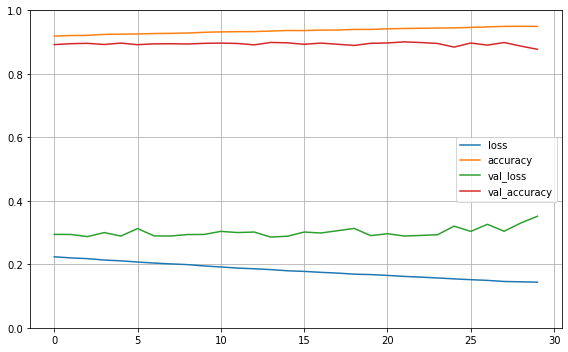

In [42]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
save_fig("keras_learning_curves_plot")
plt.show()

In [44]:
model2.evaluate(X_test,y_test)# evaluasi model dengan test set 10000 data

313/313 [==============================] - 0s 1ms/step - loss: 0.3986 - accuracy: 0.8666


[0.39859703183174133, 0.866599977016449]

this good, hasilnya pada test < validasi karena di test tidak di tweak tune sedangkan validasi di tweak tune di setiap epochnya.jangan pernah melakukan tweak tune pada test karena ga realistik untuk generalisasi error pada model dalam melakukan evaluasi

In [52]:
# predict the model

X_new = X_test[:3]
y_proba = model2.predict(X_new)
y_proba.round(2)# round => merubah sebuah float formating angka di belakang koma


1/1 [==============================] - 0s 14ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

kita lihat pada instance

1 : index 10 => ankle boot dengan probabilitas 100%

2 : index 2 => pullover dengan probabilitas 99%

3 : index 1 => trouser dengan probabilitas sebesar 100%

In [53]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [62]:
# estimasikan dengan highest proba pda index adalah y predict
y_predict = model2.predict(X_new)
y_predict=np.argmax(y_predict,axis=1)
y_predict

1/1 [==============================] - 0s 15ms/step


array([9, 2, 1], dtype=int64)

In [63]:
np.array(class_names)[y_predict]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [64]:
# pembuktian
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

hasilnya sama dengan hasil dari prediksi pada x_test maka dapat di tapsirkan bahwa prediksi probabilitas dalam case classification is prefectly

save figure fashion_mnist_images_plot


C:\Users\User\AppData\Local\Temp\ipykernel_10984\1197260370.py:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "resolution" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(path,format=fig_extension,resolution=resolution)


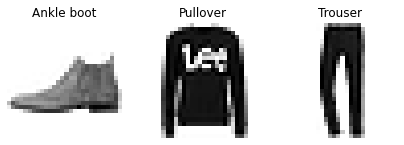

In [66]:
plt.figure(figsize=(7,3))
for index, image in enumerate(X_new):
    plt.subplot(1,3,index + 1)
    plt.imshow(image,cmap='binary',interpolation='nearest')
    plt.axis('off')
    plt.title(class_names[y_test[index]],fontsize=12)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()